<a href="https://www.kaggle.com/code/rugvedmanoorkar/notebook7f6debb900?scriptVersionId=95178587" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Problem

#### * Pneumonia can range from a mild to serious or life-threatening infection and can sometimes lead to death.
#### * Detected using X-ray imaging.
#### * Commonly misclassified as other diseases since radiographs are not particularly clear.

## Proposed Solution

#### * Machine learning models can be used to identify pneumonia in chest X-rays
#### * Intend to develop robust classifiers using Support Vector Machine (SVM) machine learning technique  to detect the presence of Pneumonia in chest X-ray images



In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats

## Dataset

#### * 5856 labelled chest X-rays
#### * 4273 X-ray images are from different subjects affected by pneumonia
#### *1583 X-ray images are labelled as not having pneumonia.
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


In [3]:
main_path='../input/chest-xray-pneumonia/chest_xray/train/'
folder_names = []
for entry_name in os.listdir('../input/chest-xray-pneumonia/chest_xray/train/'):
    #print(entry_name)
    entry_path = os.path.join('../input/chest-xray-pneumonia/chest_xray/train/', entry_name)
    if os.path.isdir(entry_path):
       # print(entry_path)
        folder_names.append(entry_name)
        
print('The Categories are',folder_names)
DIR = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

The Categories are ['PNEUMONIA', 'NORMAL']
3875


## Dataset and Preprocessing

#### * High quality JPEG images with resolution of at least 1280 x 720 pixels
#### * Image -> Grayscale -> Resize 
#### * ‘1’ - pneumonia (positive) samples
#### * ‘0’- pneumonia (negative) samples


In [4]:
images = []
labels = []
normal_limit=1000
p_limit=1000
img_size=256

main_path='../input/chest-xray-pneumonia/chest_xray/train/'
folder_names = []
for entry_name in os.listdir('../input/chest-xray-pneumonia/chest_xray/train/'):
    entry_path = os.path.join('../input/chest-xray-pneumonia/chest_xray/train/', entry_name)
    if os.path.isdir(entry_path):
        folder_names.append(entry_name)
        
print('The Categories are',folder_names)

j=0
for folder in folder_names:
    if folder == "PNEUMONIA":
        limit= p_limit
    else:
        limit= normal_limit
    for filename in os.listdir(os.path.join(main_path,folder)):
        img_path = os.path.join(main_path,folder)
        img = cv2.imread(os.path.join(img_path,filename)) 
        if img is not None:
            img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)   
            img = cv2.resize(img,(img_size, img_size))
            images.append(img)
            if folder == 'NORMAL':
                labels.append(0)
                #print('normal')
            else:
                labels.append(1)
                #print('PNE')
        j=j+1
        if j >= limit:
            j=0
            break
            
images,labels=np.array(images),np.array(labels)
print(images.shape)
#print(labels)

The Categories are ['PNEUMONIA', 'NORMAL']
(2000, 256, 256)


## Feature Extraction

#### * Extract 10 features from all the images to form a feature vector for each sample: variance, mean, standard deviation, skew, kurtosis, entropy, canny edges, local binary pattern (LBP), Sobel X, and Sobel Y. [in progress]
#### * LBP : Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number
#### * Canny Edges : makes it easy to segment the image (break it up into separate objects or areas), which can then be recognised separately.
#### * Entropy : defined as corresponding states of intensity level which individual pixels can adapt. It is used in the quantitative analysis and evaluation image details, the entropy value is used as it provides better comparison of the image details


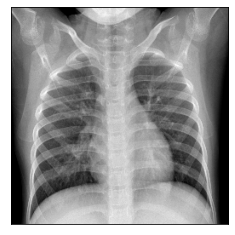

1


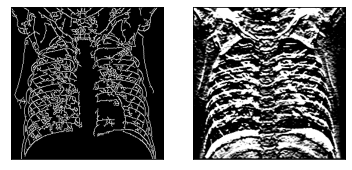

In [5]:
from random import randrange

i = randrange(limit*2)

plt.imshow(images[i],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
print(labels[i])

#Canny
canny = cv2.Canny(images[i],40,200)


#Sobel
sobelY = cv2.Sobel(images[i],cv2.CV_8UC1,0,1,ksize=5)

preview = [canny,sobelY]
i=0
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(preview[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
#Obtaining Variance of images
kernel = np.ones((3,3),np.uint8)
#print(kernel)
var_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    var_vector[i] = np.var(x)
    i=i+1
print(var_vector[6])

[38808.80390619]


In [7]:
#Obtaining lbp of images
from skimage.feature import multiblock_lbp
lbp_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    lbp = multiblock_lbp(image, 0,0,28,28)
    lbp_vector[i] = lbp
    i=i+1
print(lbp_vector)

[[196.]
 [196.]
 [128.]
 ...
 [128.]
 [165.]
 [160.]]


In [8]:
#Obtaining Mean of images
mean_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    mean_vector[i] = np.mean(x)
    i=i+1
print(mean_vector[6])

[257.00392157]


In [9]:
#Obtaining Standard Deviation of images
std_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    std_vector[i] = np.std(x)
    i=i+1
print(std_vector[6])

[196.9995023]


In [10]:
skew_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    skew_vector[i] = stats.skew(x)
    i=i+1
print(skew_vector[6])

[0.23725097]


In [11]:
#Obtaining Kurtosis of images
kurto_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    kurto_vector[i] = stats.kurtosis(x)
    i=i+1
print(kurto_vector[6])
#Obtaining Entropy of images
entropy_vector = np.empty((normal_limit+p_limit,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    entropy_vector[i] = stats.entropy(x)
    i=i+1
print(entropy_vector[6])
print(np.shape(entropy_vector))

[-0.66360991]
[5.16075635]
(2000, 1)


In [12]:
#Applying Canny edge detection
canny_vector = np.empty((normal_limit+p_limit,img_size*img_size))
i = 0
for image in images:
    canny = cv2.Canny(image,40,200)
    canny_vector[i] = np.array(canny.flatten())
    i=i+1
print(np.shape(canny_vector))

(2000, 65536)


In [13]:
#Applying Sobel X
sobelX_vector = np.empty((normal_limit+p_limit,img_size*img_size))
i = 0
for image in images:
    sobelX = cv2.Sobel(image,cv2.CV_8UC1,1,0,ksize=5)
    sobelX_vector[i] = np.array(sobelX.flatten())
    i=i+1
#Applying Sobel Y
sobelY_vector = np.empty((normal_limit+p_limit,img_size*img_size))
i = 0
for image in images:
    sobelY = cv2.Sobel(image,cv2.CV_8UC1,0,1,ksize=5)
    sobelY_vector[i] = np.array(sobelY.flatten())
    i=i+1

In [14]:
print(np.shape(sobelX_vector))

(2000, 65536)


In [15]:
feature_vector = np.empty((normal_limit+p_limit,0))
#feature_vector=np.append(feature_vector,mean_vector,axis=1)
feature_vector=np.append(feature_vector,lbp_vector,axis=1)
feature_vector=np.append(feature_vector,var_vector,axis=1)
feature_vector=np.append(feature_vector,std_vector,axis=1)
feature_vector=np.append(feature_vector,skew_vector,axis=1)
feature_vector=np.append(feature_vector,kurto_vector,axis=1)
feature_vector=np.append(feature_vector,entropy_vector,axis=1)
feature_vector=np.append(feature_vector,canny_vector,axis=1)
feature_vector=np.append(feature_vector,sobelX_vector,axis=1)
feature_vector=np.append(feature_vector,sobelY_vector,axis=1)
#feature_vector=np.append(feature_vector,hog_features,axis=1)
print(np.shape(feature_vector))
print(feature_vector[1])
#feature_vector=np.append(feature_vector,,axis=1)

(2000, 196614)
[  196.         52101.89410227   228.25839328 ...     0.
     0.             0.        ]


In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(feature_vector,labels,test_size=0.6,shuffle=True)#80% training
#pd.DataFrame(xtrain).to_csv("check.csv", sep='\t')
from sklearn.model_selection import cross_val_score
print((xtrain))
print(ytrain)

[[1.92000000e+02 3.10972749e+05 5.57649306e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.32000000e+02 1.10517188e+05 3.32441255e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.10000000e+02 1.32747902e+05 3.64345855e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.01000000e+02 7.77711098e+04 2.78874721e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.64000000e+02 2.22869447e+05 4.72090507e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.28000000e+02 3.08996196e+04 1.75782876e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1
 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1
 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)
print(xtest)

[[ 1.20196443 -0.56224447 -0.64196591 ...  0.          0.
   0.        ]
 [ 1.60587294 -0.78432075 -1.12734099 ...  0.          0.
   0.        ]
 [ 1.12852652  1.11306784  1.3458127  ...  0.          0.
   0.        ]
 ...
 [ 0.59610165 -0.46298024 -0.46493768 ...  0.          0.
   0.        ]
 [-0.72578077 -0.47465172 -0.48488223 ...  0.          0.
   0.        ]
 [ 1.03672913  1.34884246  1.54503091 ...  0.          0.
   0.        ]]


In [18]:
print(labels.shape)

(2000,)


In [19]:
"""
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

classifier = SVC()
param_grid = {'C' : [1,2,3,4], 'kernel':['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, return_train_score = True, cv =5) 
   
grid.fit(xtrain, ytrain) 
 

grid_predictions = grid.predict(X_test) 
   

print(f'The best parameters are {grid.best_params_}')
print(f'The best score is {grid.best_score_}')

df=pd.DataFrame(grid.cv_results_)
df2 =df.loc[:, ["params", "mean_test_score", "mean_train_score", "rank_test_score"] ]
print (df2)
"""

'\nfrom sklearn.svm import SVC\nfrom sklearn.model_selection import GridSearchCV\n\nclassifier = SVC()\nparam_grid = {\'C\' : [1,2,3,4], \'kernel\':[\'linear\']}\ngrid = GridSearchCV(SVC(), param_grid, refit = True, return_train_score = True, cv =5) \n   \ngrid.fit(xtrain, ytrain) \n \n\ngrid_predictions = grid.predict(X_test) \n   \n\nprint(f\'The best parameters are {grid.best_params_}\')\nprint(f\'The best score is {grid.best_score_}\')\n\ndf=pd.DataFrame(grid.cv_results_)\ndf2 =df.loc[:, ["params", "mean_test_score", "mean_train_score", "rank_test_score"] ]\nprint (df2)\n'

Test Accuracy: 0.9591666666666666


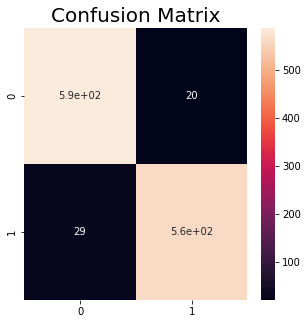

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       608
           1       0.97      0.95      0.96       592

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



In [20]:

from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

clf = svm.SVC(kernel = "linear", random_state=0,probability = True)

#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
ypredict = clf.predict(xtest)
#print(clf.score(xtest,ytest))

#ypredict = clf.predict(xtrain)
#print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict))

cm = confusion_matrix(ytest, ypredict)
#cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

print(classification_report(ytest,ypredict))
#print(classification_report(ytrain,ypredict))


In [21]:

import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)
y_proba = clf.predict_proba(xtest)
print(y_proba)


0.9591666666666666
[[5.29909849e-06 9.99994701e-01]
 [1.13557991e-02 9.88644201e-01]
 [2.80495186e-07 9.99999720e-01]
 ...
 [6.59225815e-07 9.99999341e-01]
 [9.94748194e-07 9.99999005e-01]
 [9.74108383e-01 2.58916170e-02]]


In [22]:
y_prob = clf.predict(xtest)
print(y_prob)

[1 1 1 ... 1 1 0]


In [23]:
test1 = "../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg"
test0 = "../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0013-0001.jpeg"


In [24]:
t_image = []
def img_convert(path):
    img = cv2.imread(path) 
    if img is not None:
        img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)   
        img = cv2.resize(img,(img_size, img_size))
        t_image.append(img)
img_convert(test1)
t_image = np.array(t_image)
print(t_image)
#y_prob = clf.predict(t_image)
#print(y_prob)

[[[ 54  42  39 ...  36  32  36]
  [130  58  64 ...  76  70  59]
  [128 180 175 ...  43  34  29]
  ...
  [ 76  47  33 ...  12  23  31]
  [ 76  46  34 ...  19  26  48]
  [ 77  45  33 ...  23  20  82]]]


In [25]:
print("Xtest ", xtest.shape)
def image_convert2(path,fs):
    images = []
    labels = []
    normal_limit=1
    p_limit=0
    img_size=256

    img = cv2.imread(path) 
    if img is not None:
        img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)   
        img = cv2.resize(img,(img_size, img_size))
        images.append(img)
    images,labels=np.array(images),np.array(labels)
    print(images.shape)
    #print(labels)
    
    #Obtaining Variance of images
    kernel = np.ones((3,3),np.uint8)
    #print(kernel)
    var_vector = np.empty((normal_limit+p_limit,1))
    i = 0
    for image in images:
        x, bins = np.histogram(image,bins=255, density=False)
        var_vector[i] = np.var(x)
        i=i+1
    #print(var_vector[6])
    
    #Obtaining lbp of images
    from skimage.feature import multiblock_lbp
    lbp_vector = np.empty((normal_limit+p_limit,1))
    i = 0
    for image in images:
        lbp = multiblock_lbp(image, 0,0,28,28)
        lbp_vector[i] = lbp
        i=i+1
    print("LBP Vector shape", lbp_vector.shape)
    
    #Obtaining Mean of images
    mean_vector = np.empty((normal_limit+p_limit,1))
    i = 0
    for image in images:
        x, bins = np.histogram(image,bins=255, density=False)
        mean_vector[i] = np.mean(x)
        i=i+1
    #print(mean_vector[6])
    
    #Obtaining Standard Deviation of images
    std_vector = np.empty((normal_limit+p_limit,1))
    i = 0
    for image in images:
        x, bins = np.histogram(image,bins=255, density=False)
        std_vector[i] = np.std(x)
        i=i+1
    #print(std_vector[6])
    
    skew_vector = np.empty((normal_limit+p_limit,1))
    i = 0
    for image in images:
        x, bins = np.histogram(image,bins=255, density=False)
        skew_vector[i] = stats.skew(x)
        i=i+1
    #print(skew_vector[6])
    
    #Obtaining Kurtosis of images
    kurto_vector = np.empty((normal_limit+p_limit,1))
    i = 0
    for image in images:
        x, bins = np.histogram(image,bins=255, density=False)
        kurto_vector[i] = stats.kurtosis(x)
        i=i+1
    #print(kurto_vector[6])
    #Obtaining Entropy of images
    entropy_vector = np.empty((normal_limit+p_limit,1))
    i = 0
    for image in images:
        x, bins = np.histogram(image,bins=255, density=False)
        entropy_vector[i] = stats.entropy(x)
        i=i+1
    #print(entropy_vector[6])
    print(np.shape(entropy_vector))
    
    #Applying Canny edge detection
    canny_vector = np.empty((normal_limit+p_limit,img_size*img_size))
    i = 0
    for image in images:
        canny = cv2.Canny(image,40,200)
        canny_vector[i] = np.array(canny.flatten())
        i=i+1
    print(np.shape(canny_vector))
    
    #Applying Sobel X
    sobelX_vector = np.empty((normal_limit+p_limit,img_size*img_size))
    i = 0
    for image in images:
        sobelX = cv2.Sobel(image,cv2.CV_8UC1,1,0,ksize=5)
        sobelX_vector[i] = np.array(sobelX.flatten())
        i=i+1
    #Applying Sobel Y
    sobelY_vector = np.empty((normal_limit+p_limit,img_size*img_size))
    i = 0
    for image in images:
        sobelY = cv2.Sobel(image,cv2.CV_8UC1,0,1,ksize=5)
        sobelY_vector[i] = np.array(sobelY.flatten())
        i=i+1

    feature_vector = np.empty((normal_limit+p_limit,0))
    print("NL", normal_limit)
    print("PL", p_limit)
    #feature_vector=np.append(feature_vector,mean_vector,axis=1)
    feature_vector=np.append(feature_vector,lbp_vector,axis=1)
    feature_vector=np.append(feature_vector,var_vector,axis=1)
    feature_vector=np.append(feature_vector,std_vector,axis=1)
    feature_vector=np.append(feature_vector,skew_vector,axis=1)
    feature_vector=np.append(feature_vector,kurto_vector,axis=1)
    feature_vector=np.append(feature_vector,entropy_vector,axis=1)
    feature_vector=np.append(feature_vector,canny_vector,axis=1)
    feature_vector=np.append(feature_vector,sobelX_vector,axis=1)
    feature_vector=np.append(feature_vector,sobelY_vector,axis=1)
    #feature_vector=np.append(feature_vector,hog_features,axis=1)
    print("FV",np.shape(feature_vector))
    
    fs = np.append(fs,feature_vector,axis=1)
    
    print((fs))
    return fs
fs = np.empty((1,0))
fs2 = image_convert2(test1,fs)
#fs2= np.append(fs,feature_vector[1],axis=1)
print("FS after",np.shape(fs2) )
print("Feature vecotr shape [1]: ", np.shape([feature_vector[1]]))
fs2= np.append(fs2,[feature_vector[1]],axis=0)
print("FS after after",np.shape(fs2) )
fs2 = sc.fit_transform(fs2)
print(fs2)
y_prob = clf.predict(fs2)
print(y_prob, "LOLLLLLL")



Xtest  (1200, 196614)
(1, 256, 256)
LBP Vector shape (1, 1)
(1, 1)
(1, 65536)
NL 1
PL 0
FV (1, 196614)
[[  196.         59955.90194541   244.85894296 ...     0.
      0.             0.        ]]
FS after (1, 196614)
Feature vecotr shape [1]:  (1, 196614)
FS after after (2, 196614)
[[ 0.  1.  1. ...  0.  0.  0.]
 [ 0. -1. -1. ...  0.  0.  0.]]
[1 0] LOLLLLLL
